In [89]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [90]:
df=pd.read_csv('Titanic-Dataset.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [91]:
df['Cabin'].isna().sum()

np.int64(687)

In [92]:
df.shape

(891, 12)

In [93]:
df.drop('Cabin', axis=1, inplace=True)

In [94]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [95]:
def basic_overview(df):
    print('\nTop 10 rows:\n', df.head(5))
    print('\nLast 10 rows:\n', df.tail(5))
    print('\nSample 10 rows:\n', df.sample(5))
    print('\Dataset size=',df.shape)
    print('\nStatiscal Summary (describe):\n',df.describe())
    print('info Data')
    df.info()
basic_overview(df)


Top 10 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  

Last 10 rows:
      Pa

### CHECK MISSING VALUE

In [96]:
print("Check Missing Value")
for col in df.columns:
    missing_value=df[col].isna().sum()
    percentage=missing_value*100/len(df)
    print("%s: %.2f%% (%d)" % (col, percentage, missing_value))

print("HANDLE DUPLICATED VALUE")
print("total number of duplicated is",df.duplicated().sum())

Check Missing Value
PassengerId: 0.00% (0)
Survived: 0.00% (0)
Pclass: 0.00% (0)
Name: 0.00% (0)
Sex: 0.00% (0)
Age: 19.87% (177)
SibSp: 0.00% (0)
Parch: 0.00% (0)
Ticket: 0.00% (0)
Fare: 0.00% (0)
Embarked: 0.22% (2)
HANDLE DUPLICATED VALUE
total number of duplicated is 0


In [97]:
#Fill age missing value with median
print("Fill age missing value with median...")
df["Age"]=df['Age'].fillna(df['Age'].median())
#Fill age missing value with median
print("Fill embarked missing value with mode...")
df["Embarked"]=df['Embarked'].fillna(df['Embarked'].mode()[0])
# Final check for missing values
print("\nMissing Values Summary:")
print(df.isna().sum())

Fill age missing value with median...
Fill embarked missing value with mode...

Missing Values Summary:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### RENAME THE COLUMN

In [98]:
df.columns=df.columns.str.strip().str.lower()

In [99]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

#### USES OF DESCRIBE 

In [100]:
display(df.describe(include=[np.number]).T)
display(df.describe(include=['object','category']).T)

,count,mean,std,min,25%,50%,75%,max
passengerid,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


,count,unique,top,freq
name,891,891,"Dooley, Mr. Patrick",1
sex,891,2,male,577
ticket,891,681,347082,7
embarked,891,3,S,646


In [101]:
# Unique categorical values
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in name: 891
Unique values in sex: 2
Unique values in ticket: 681
Unique values in embarked: 3


In [102]:
# Overall survival rate
survival_rate = df['survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")

# Survival by Sex
print("\nSurvival Rate by Sex:")
print((df.groupby('sex')['survived'].mean() * 100).round(2))

# Survival by Class
print("\nSurvival Rate by Passenger Class:")
print((df.groupby('pclass')['survived'].mean() * 100).round(2))

Overall Survival Rate: 38.38%

Survival Rate by Sex:
sex
female    74.20
male      18.89
Name: survived, dtype: float64

Survival Rate by Passenger Class:
pclass
1    62.96
2    47.28
3    24.24
Name: survived, dtype: float64


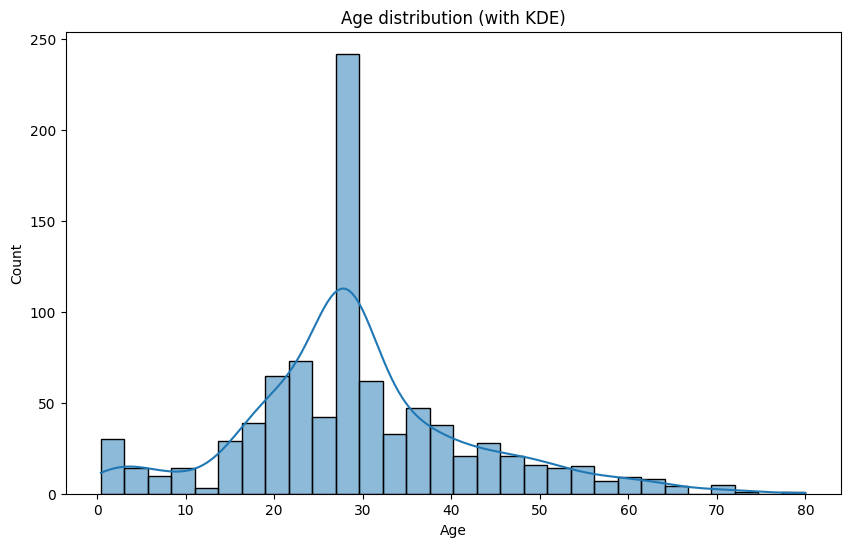

In [103]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],kde=True)
plt.title('Age distribution (with KDE)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

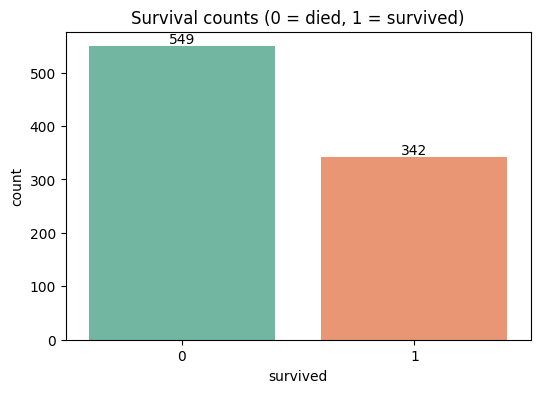

In [104]:
# Countplot of Survived
plt.figure(figsize=(6,4))
ax=sns.countplot(x='survived', data=df, palette="Set2")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Survival counts (0 = died, 1 = survived)')
plt.show()

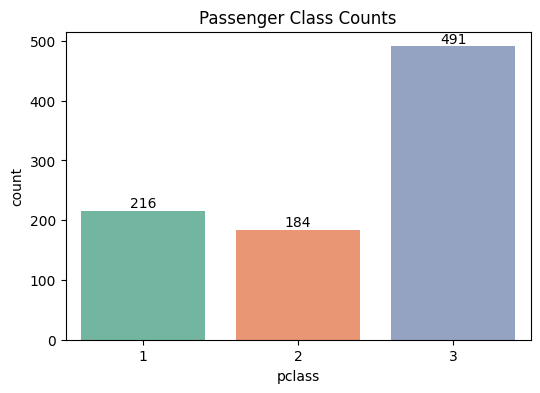

In [105]:
# Countplot of Passenger Class
plt.figure(figsize=(6,4))
ax=sns.countplot(x='pclass', data=df, palette="Set2")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Passenger Class Counts')
plt.show()

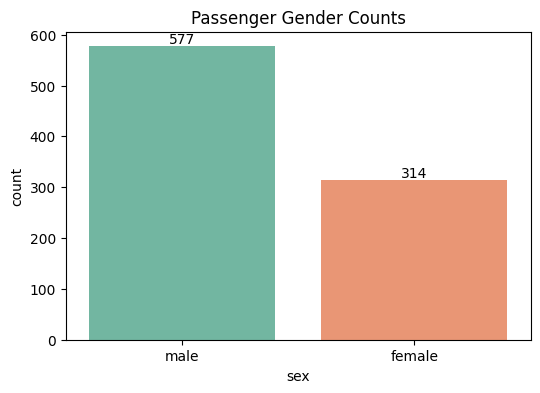

In [106]:
# Countplot of gender
plt.figure(figsize=(6,4))
ax=sns.countplot(x='sex', data=df, palette="Set2")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Passenger Gender Counts')
plt.show()

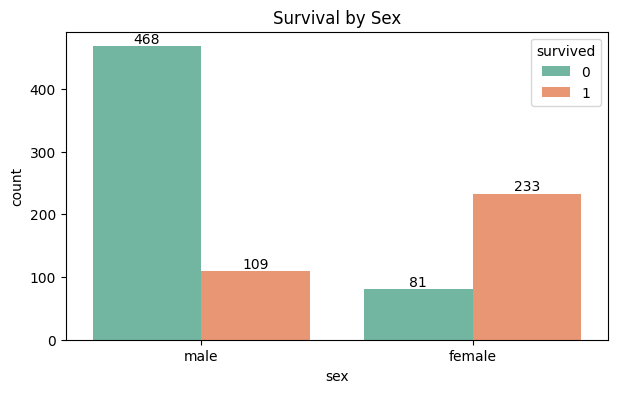

In [107]:
# Survival by Sex
plt.figure(figsize=(7,4))
ax=sns.countplot(x='sex', hue='survived', data=df, palette='Set2')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Survival by Sex')
plt.show()

pclass
1    136
2     87
3    119
Name: survived, dtype: int64


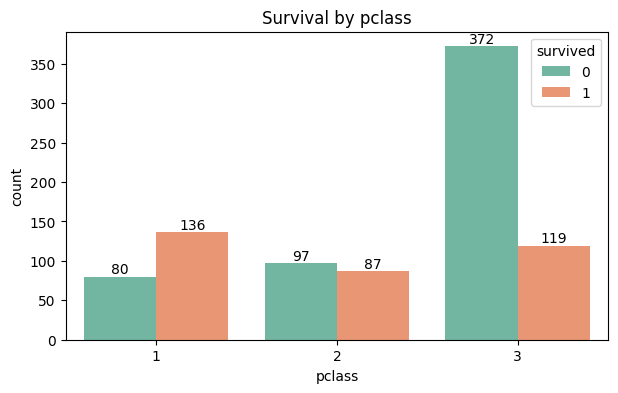

In [108]:
surv_by_pclass = df.groupby('pclass')['survived'].sum()
print(surv_by_pclass)
plt.figure(figsize=(7,4))
ax=sns.countplot(x='pclass', hue='survived', data=df, palette='Set2')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Survival by pclass')
plt.show()

In [109]:
df.groupby('pclass')['fare'].sum()

pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: fare, dtype: float64

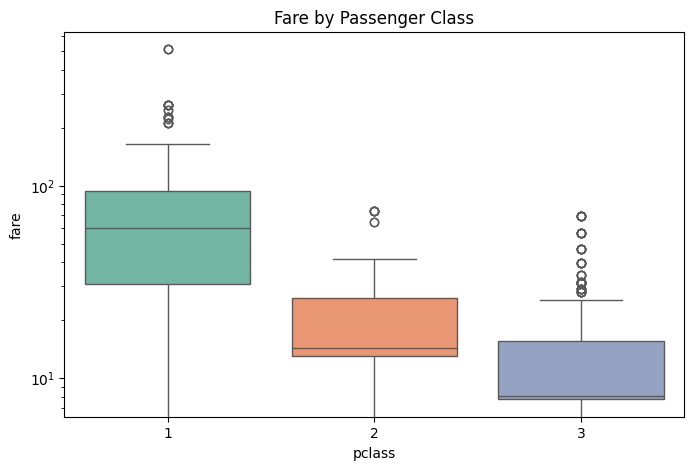

In [110]:
# Fare by Pclass (boxplot)

plt.figure(figsize=(8,5))
sns.boxplot(x='pclass', y='fare', data=df, palette="Set2")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Fare by Passenger Class')
plt.yscale('log') 
plt.show()

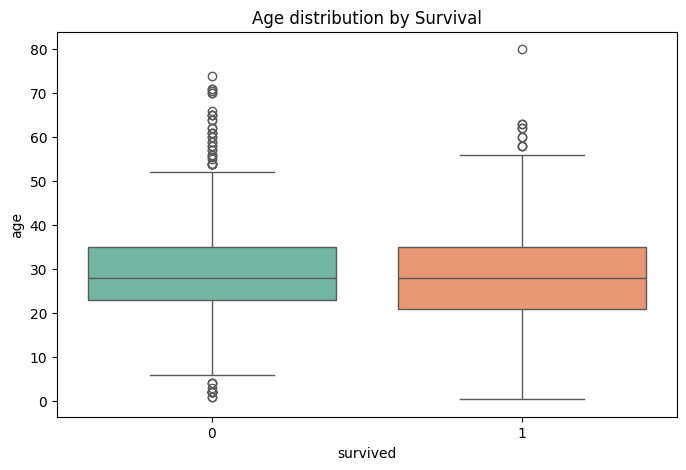

In [111]:
# Age by Survived (boxplot)

plt.figure(figsize=(8,5))
sns.boxplot(x='survived', y='age', data=df, palette="Set2")
plt.title('Age distribution by Survival')
plt.show()

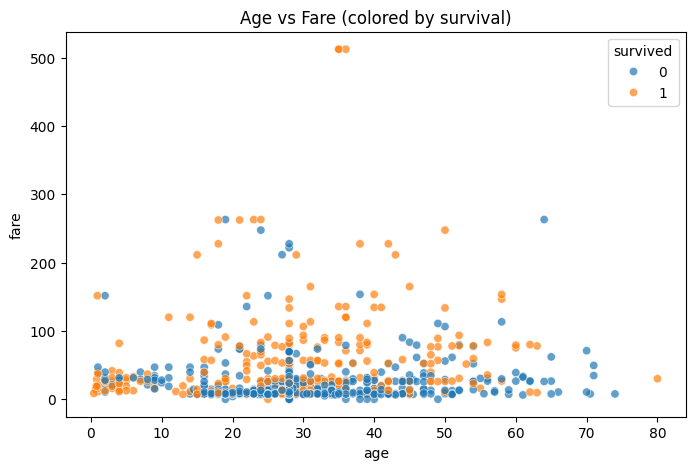

In [112]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='fare', hue='survived', data=df, alpha=0.7)
plt.title('Age vs Fare (colored by survival)')
plt.show()

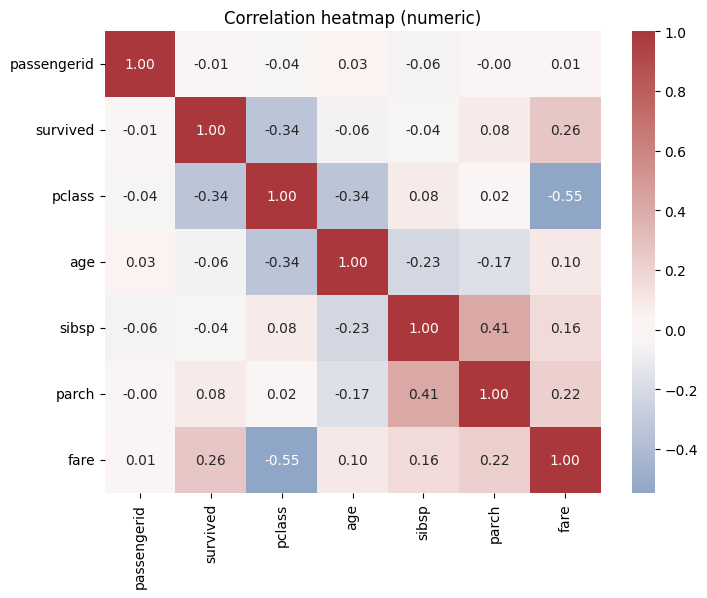

In [113]:
# Correlation heatmap (numeric only)
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Correlation heatmap (numeric)')
plt.show()

In [114]:
summary = """
#  Titanic Dataset - Exploratory Data Analysis (EDA)

## Key Insights:
1. **Overall Survival Rate:** {:.2f}% of passengers survived.
2. **Sex Impact:** Female survival rate ({:.2f}%) was much higher than male survival rate ({:.2f}%).
3. **Class Impact:** Survival was highest in 1st class ({:.2f}%) and lowest in 3rd class ({:.2f}%).
4. **Age Insights:** Median passenger age = {:.0f} years. Survival was higher for children and young adults.
5. **Fare Insights:** Higher fares were associated with higher survival chances.
7. **Embarked Port:** Most passengers embarked from 'S'. Those from 'C' had the highest survival rates.

## Data Quality Notes:
- Missing values originally in `Age`, `Embarked`, and `Cabin`.
- We imputed `Age` with median, `Embarked` with mode, dropped/ignored `Cabin` due to too many missing values.
- No duplicate rows found.
"""

print(summary.format(
    df['survived'].mean()*100,
    df[df['sex']=='female']['survived'].mean()*100,
    df[df['sex']=='male']['survived'].mean()*100,
    df.groupby('pclass')['survived'].mean()[1]*100,
    df.groupby('pclass')['survived'].mean()[3]*100,
    df['age'].median()
))


#  Titanic Dataset - Exploratory Data Analysis (EDA)

## Key Insights:
1. **Overall Survival Rate:** 38.38% of passengers survived.
2. **Sex Impact:** Female survival rate (74.20%) was much higher than male survival rate (18.89%).
3. **Class Impact:** Survival was highest in 1st class (62.96%) and lowest in 3rd class (24.24%).
4. **Age Insights:** Median passenger age = 28 years. Survival was higher for children and young adults.
5. **Fare Insights:** Higher fares were associated with higher survival chances.
7. **Embarked Port:** Most passengers embarked from 'S'. Those from 'C' had the highest survival rates.

## Data Quality Notes:
- Missing values originally in `Age`, `Embarked`, and `Cabin`.
- We imputed `Age` with median, `Embarked` with mode, dropped/ignored `Cabin` due to too many missing values.
- No duplicate rows found.

